## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#warnings.simplefilter('ignore')

import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
import itertools


sklearn dataset
https://scikit-learn.org/stable/datasets/index.html

- boston: the boston house-prices dataset (**regression**).
- iris: the iris dataset (**classification**).
- diabetes: the diabetes dataset (**regression**).
- digits: the digits dataset (**classification**).
- linnerud: the linnerud dataset (**multivariate regression**).
- wine: the wine dataset (**classification**).
- breast_cancer: the breast cancer wisconsin dataset (**classification**).

## 資料集目標: 回歸 Boston house prices dataset
### Linear Regression

In [2]:
# 讀取波士頓房價資料集
boston = datasets.load_boston()

print(boston.feature_names)

dataset = boston
df = pd.DataFrame(np.c_[dataset['data'], dataset['target']], columns= np.append(dataset['feature_names'], ['target']))

#df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
#df_target = pd.DataFrame(dataset.target, columns=dataset.target)

print(df.head())

## 檢查資料的 shape (有多少 samples (rows), 多少 features (columns)，label 的型態是什麼？)
print(df.shape)
print(df.info())
#print(df.describe())

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
#X = dataset.data[:, np.newaxis, 2]
#X = dataset.data[:, 5].reshape(-1,1)
#y = dataset.target.reshape(-1,1)
X = dataset.data

#X = dataset.data['CRIM'][:, np.newaxis, 2]
print("Data shape: ", X.shape) # 可以看見有 506 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, dataset.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  
(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 

In [3]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")

Coefficients:  [-1.25856659e-01  4.84257396e-02  1.84085281e-02  3.08509569e+00
 -1.73277018e+01  3.61674713e+00  2.19181853e-03 -1.49361132e+00
  3.19979200e-01 -1.27294649e-02 -9.27469086e-01  9.50912468e-03
 -5.33592471e-01]
Mean squared error: 17.04


In [4]:
print(f"score: {regr.score(x_test, y_test):.2f}")

score: 0.79


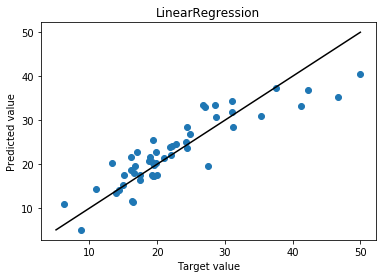

In [5]:
plt.scatter(y_test, y_pred)
#plt.plot([min(y_test),max(y_test)],[min(y_pred),max(y_pred)],'k')
min_x = min_y = min(min(y_test),min(y_pred))
max_x = max_y = max(max(y_test),max(y_pred)) 
plt.plot([min_x, max_x], [min_y, max_y],'k')
plt.xlabel('Target value')
plt.ylabel('Predicted value')
plt.title('LinearRegression')
plt.show()

#import seaborn as sns
#sns.regplot(x="total_bill", y="tip", data=dataset.data);
#sns.lmplot(x="total_bill", y="tip", data=tips);

# 畫出回歸模型與實際資料的分佈
#plt.scatter(x_test, y_test,  color='black')
#plt.plot(x_test, y_pred, color='blue', linewidth=3)
#plt.show()

## 資料集目標: 分類  Wine recognition dataset   Breast cancer wisconsin (diagnostic) dataset
### Logistics Regression

In [6]:
# 讀取酒類識別資料集
#wine = datasets.load_wine()
cancer = datasets.load_breast_cancer()

# 切分訓練集/測試集
#x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [7]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.8771929824561403


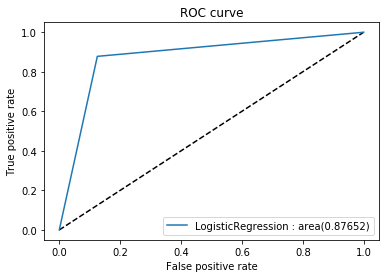

In [8]:

# 將預測結果輸出
#pred_rf = rf.predict_proba(test_X)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
score = roc_auc_score(y_test, y_pred)

# 將結果繪圖
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'LogisticRegression : area({score:.5f})')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


#[comment]: ref Day 30

In [9]:
'''
ref: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
'''
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[14  2]
 [ 5 36]]
Normalized confusion matrix
[[0.875      0.125     ]
 [0.12195122 0.87804878]]


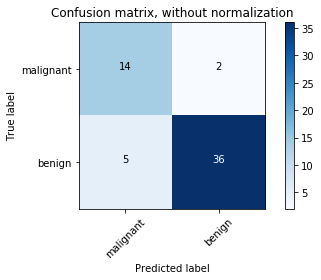

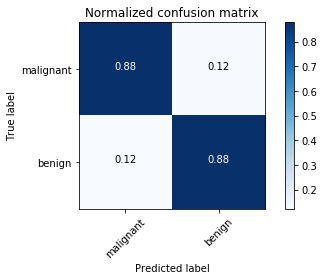

In [10]:
class_names = cancer.target_names

cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()